In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
from scipy.io import loadmat                    # To load .mat files
from pylab import *                             # Import plotting functions
from IPython.lib.display import YouTubeVideo    # Package for displaying YouTube videos

In [7]:
# ... and the tools that we will need for this notebook
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)               # Change the default figure size

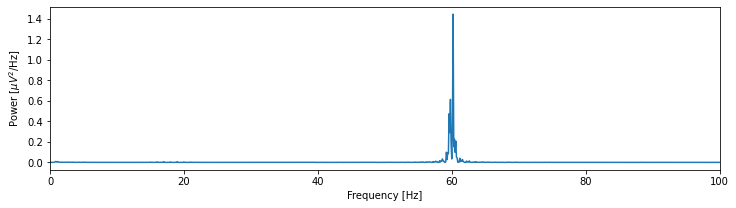

In [8]:
data = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/EEG-1.mat')  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()